## Тема “Обучение без учителя”<a class='anckor' id='start'>
   - [Задание № 1](#task1);
   - [Задание № 2](#task2);
   - [Задание № 3](#task3).

### Задание № 1<a class='anckor' id='task1'>
    
   - Импортируйте библиотеки pandas, numpy и matplotlib.
   - Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
   - Создайте датафреймы X и y из этих данных.
   - Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
   - Масштабируйте данные с помощью StandardScaler.
   - Постройте модель TSNE на тренировочный данных с параметрами:
       * n_components=2, learning_rate=250, random_state=42.
   - Постройте диаграмму рассеяния на этих данных.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [14]:
# Функция для автоматического уменьшения объёма памати за счёт оптимизации количественных переменных датасета
def reduce_mem_usage(df):
    
    # Определение количество памяти занятой исходным датасетом
    start_mem = df.memory_usage().sum() / 1024**2
    print('Исходным датафреймом использована память в размере: {:.2f} MB'.format(start_mem))
    
    # итерация по признакам (столбцам) датасета
    for col in df.columns:
        col_type = df[col].dtype
        
        # для количественной переменной определяем min и max значения
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            # для целочисленной переменной определяем оптимальный тип и меняем на него у признака
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)  # от -128 до 127 (1 байт)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)  # от -32768 до 32767 (2 байта)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)  # 4 байта
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  # 8 байтов
                    
            # для вещественной переменной определяем оптимальный тип и меняем на него у признака
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)  # 4 байта
                else:
                    df[col] = df[col].astype(np.float64)  # 8 байтов
        else:
            df[col] = df[col].astype('category')

    # Определение количество памяти занятой оптимизированным датасетом
    end_mem = df.memory_usage().sum() / 1024**2
    print('Оптимизированным датафреймом использована память в размере: {:.2f} MB'.format(end_mem))
    print('Использованная датафреймом память уменьшилась на {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

#### Загрузка и изучение данных из набора "Boston House Prices dataset"

In [2]:
from sklearn.datasets import load_boston

dataset_ = load_boston()
type(dataset_)

sklearn.utils.Bunch

In [3]:
dataset_.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
dataset_['data'][:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [5]:
dataset_['data'].shape

(506, 13)

In [6]:
dataset_['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
dataset_['feature_names'].shape

(13,)

In [8]:
print(dataset_['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
dataset_['target'][:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [10]:
dataset_['target'].shape

(506,)

#### Создание датафреймов X и y

In [11]:
X = pd.DataFrame(dataset_['data'], columns=dataset_['feature_names'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [15]:
reduce_mem_usage(X)
X.info()

Исходным датафреймом использована память в размере: 0.05 MB
Оптимизированным датафреймом использована память в размере: 0.03 MB
Использованная датафреймом память уменьшилась на 49.9%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float32
 1   ZN       506 non-null    float32
 2   INDUS    506 non-null    float32
 3   CHAS     506 non-null    float32
 4   NOX      506 non-null    float32
 5   RM       506 non-null    float32
 6   AGE      506 non-null    float32
 7   DIS      506 non-null    float32
 8   RAD      506 non-null    float32
 9   TAX      506 non-null    float32
 10  PTRATIO  506 non-null    float32
 11  B        506 non-null    float32
 12  LSTAT    506 non-null    float32
dtypes: float32(13)
memory usage: 25.8 KB


In [16]:
y = pd.DataFrame(dataset_['target'], columns=['Price'])
y.head()

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [17]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [18]:
reduce_mem_usage(y).info()

Исходным датафреймом использована память в размере: 0.00 MB
Оптимизированным датафреймом использована память в размере: 0.00 MB
Использованная датафреймом память уменьшилась на 48.5%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   506 non-null    float32
dtypes: float32(1)
memory usage: 2.1 KB


Оба датафрейма оптимизированы и не имеют пропуски в данных.

#### Разбиение датафреймов на train и test

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404, 1), (102, 13), (102, 1))

#### Масштабирование данных с помощью StandardScale

In [20]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609124,11.569307,10.985050,0.071782,0.556484,6.315893,68.556465,3.808196,9.356436,404.032166,18.318344,356.278259,12.457352
std,8.875057,23.152452,6.894617,0.258446,0.117704,0.709452,27.994925,2.131226,8.589717,166.172516,2.228702,91.566605,7.110379
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.549999,2.087875,4.000000,279.000000,16.799999,375.472488,6.772500
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.699997,3.175750,5.000000,330.000000,18.700001,391.304993,10.925000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200001,395.754997,16.372500
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-2.950725e-09,8.852175e-10,-1.954855e-08,1.460609e-08,-3.555624e-08,-1.088080e-08,-1.770435e-09,-4.721160e-09,4.868696e-09,1.008779e-08,1.976986e-08,1.357334e-08,-1.143406e-08
std,1.001240e+00,1.001238e+00,1.001240e+00,1.001239e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.061414e-01,-5.003201e-01,-1.487791e+00,-2.780887e-01,-1.458711e+00,-3.461733e+00,-2.348206e+00,-1.258391e+00,-9.740476e-01,-1.307684e+00,-2.568943e+00,-3.892249e+00,-1.510559e+00
25%,-3.979761e-01,-5.003201e-01,-8.502733e-01,-2.780887e-01,-8.887828e-01,-6.003491e-01,-8.228265e-01,-8.081981e-01,-6.243599e-01,-7.533562e-01,-6.821015e-01,2.098796e-01,-8.005057e-01
50%,-3.776748e-01,-5.003201e-01,-3.521669e-01,-2.780887e-01,-1.572335e-01,-1.494427e-01,3.270200e-01,-2.971197e-01,-5.077973e-01,-4.460660e-01,1.714707e-01,3.830011e-01,-2.157762e-01
75%,-4.582120e-02,3.645893e-01,1.033237e+00,-2.780887e-01,6.338605e-01,4.528243e-01,8.974727e-01,7.481982e-01,3.081407e-01,1.578434e+00,8.453430e-01,4.316600e-01,5.513071e-01
max,9.630689e+00,3.824227e+00,2.433162e+00,3.595975e+00,2.675394e+00,3.477564e+00,1.124581e+00,3.907900e+00,1.706891e+00,1.849573e+00,1.653989e+00,4.441800e-01,3.592534e+00


In [22]:
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)
X_test_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,1.020000e+02,1.020000e+02,1.020000e+02,102.000000,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02
mean,1.110283e-08,-3.915207e-08,1.606988e-09,0.000000,2.804924e-08,5.697503e-09,-1.402462e-08,-6.720132e-09,-5.843593e-08,1.373244e-08,-2.045257e-08,4.499566e-08,-1.168719e-09
std,1.004938e+00,1.004938e+00,1.004938e+00,1.004938,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00
min,-4.883000e-01,-4.401863e-01,-1.685877e+00,-0.250000,-1.439907e+00,-3.935782e+00,-2.172189e+00,-1.286366e+00,-1.021593e+00,-1.341478e+00,-3.348173e+00,-3.897728e+00,-1.463204e+00
25%,-4.773815e-01,-4.401863e-01,-8.423963e-01,-0.250000,-9.194047e-01,-4.399024e-01,-8.643128e-01,-7.391787e-01,-6.925324e-01,-8.105884e-01,-3.343252e-01,1.860242e-01,-7.963289e-01
50%,-4.608763e-01,-4.401863e-01,-1.715730e-01,-0.250000,-1.444343e-01,1.463370e-02,2.105111e-01,-1.946900e-01,-5.828456e-01,-4.524150e-01,1.121714e-01,3.765528e-01,-1.516487e-01
75%,1.201040e-01,-4.401863e-01,9.510749e-01,-0.250000,6.837432e-01,4.820380e-01,9.244516e-01,5.107163e-01,1.501204e+00,1.365351e+00,6.702914e-01,4.286058e-01,6.366020e-01
max,5.673641e+00,3.523945e+00,2.392130e+00,4.000000,2.992461e+00,2.835712e+00,1.090545e+00,3.482165e+00,1.501204e+00,1.620178e+00,1.674907e+00,4.286058e-01,3.266994e+00


#### Построение модели `TSNE`

In [23]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

Алгоритм _t-SNE_ (_t-distributed Stochastic Neighbor Embedding_ или _Стохастическое вложение соседей с t-распределением_) позволяет понижать размерность данных до двух или трёх измерений, что позволяет визуализировать данные на двумерных и трёхмерных графиках. Изучая графики, можно, например, понять, на сколько кластеров адекватно разбивать данные, а также оценить уже выполненное разбиение на кластеры.

In [24]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


Получили новые данные с уменьшенной размерностью. Число признаков уменьшилось с 13 до 2.

#### Построение диаграммы рассеяния

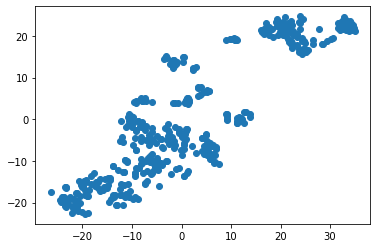

In [25]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

На диаграмме явно выделяется два кластера.

[Вернуться назад](#start)

### Задание № 2<a class='anckor' id='task2'>
   - С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. (Параметр max_iter должен быть равен 100, random_state сделайте равным 42.)
   - Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.
   - Вычислите средние значения price и CRIM в разных кластерах.

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)
labels_train[:10]

array([1, 0, 2, 1, 0, 0, 0, 2, 1, 1], dtype=int32)

#### Построение диаграммы рассеяния

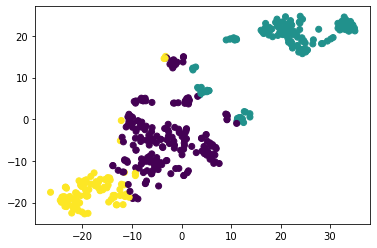

In [27]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

#### Вычисление mean() для `Price` и `CRIM` в разных кластерах

In [28]:
y_train.mean(), y_train[labels_train == 0].mean(), y_train[labels_train==1].mean(), y_train[labels_train==2].mean()

(Price    22.796539
 dtype: float32,
 Price    24.971207
 dtype: float32,
 Price    16.179688
 dtype: float32,
 Price    27.874115
 dtype: float32)

Видно, что в 'Кластер 1' попала менее дорогая недвижимость, в 'Кластер 0' - недвижимость со средней ценой, а в 'Кластер 2' - более дорогая недвижимость.

####  Построение гистограмм распределения цены по кластерам

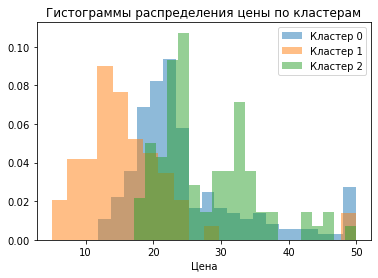

In [29]:
plt.hist(y_train[labels_train == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 2], bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')
plt.title('Гистограммы распределения цены по кластерам')

plt.show()

Гистограмма также отражает замеченную закономерность. 

Посмотрим теперь на распределение признака **`CRIM`** внутри кластеров. Он отражает криминальность места, в котором расположена недвижимость (количество преступлений на душу населения).

In [30]:
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0: 0.4209856688976288
Кластер 1: 10.715219497680664
Кластер 2: 0.07211847603321075


Видно, что данное значение сильно выше для 1-кластера, что сильно повлияло на цену недвижимости, которая в этом кластере менее дорогая. Рассмотрим гистограммы распределений значений этого признака по кластерам.

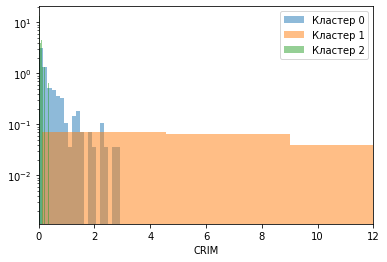

In [31]:
plt.hist(X_train.loc[labels_train == 0, 'CRIM'], bins=20, density=True, alpha=0.5, log=True)
plt.hist(X_train.loc[labels_train == 1, 'CRIM'], bins=20, density=True, alpha=0.5, log=True)
plt.hist(X_train.loc[labels_train == 2, 'CRIM'], bins=20, density=True, alpha=0.5, log=True)

plt.xlim(0, 12)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM')

plt.show()

В кластерах 0 и 2 максимальная плотность этого признака расположена возле 0. Для кластера 1 значения этого признака размещенны по всей шкале.

[Вернуться назад](#start)

### Задание № 3<a class='anckor' id='task3'>
   - Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
   - Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [32]:
labels_test = kmeans.predict(X_test_scaled)
labels_test[:10]

array([0, 2, 1, 2, 1, 0, 0, 1, 1, 0], dtype=int32)

In [33]:
y_test.mean(), y_test[labels_test == 0].mean(), y_test[labels_test==1].mean(), y_test[labels_test==2].mean()

(Price    21.488234
 dtype: float32,
 Price    21.926088
 dtype: float32,
 Price    16.437143
 dtype: float32,
 Price    28.94762
 dtype: float32)

Видно, что для тестового набора данных распределение стоимости недвижимости аналогична как и для тренировочного набора. В 'Кластер 1' попала менее дорогая недвижимость, в 'Кластер 0' - недвижимость со средней ценой, а в 'Кластер 2' - более дорогая недвижимость.

####  Построение гистограмм распределения цены по кластерам

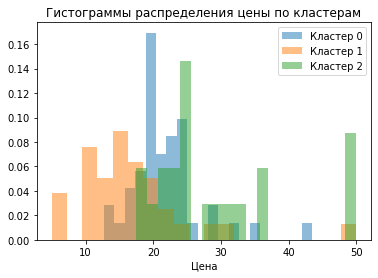

In [34]:
plt.hist(y_test[labels_test == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_test[labels_test == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_test[labels_test == 2], bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')
plt.title('Гистограммы распределения цены по кластерам')

plt.show()

Гистограмма также отражает замеченную закономерность. 

Посмотрим теперь на распределение признака **`CRIM`** внутри кластеров на тестовых данных.

In [35]:
print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Кластер 0: 0.27973610162734985
Кластер 1: 10.165532112121582
Кластер 2: 0.08071999996900558


На тестовом наборе данных распределение признака CRIM аналогично тренировочным данным.

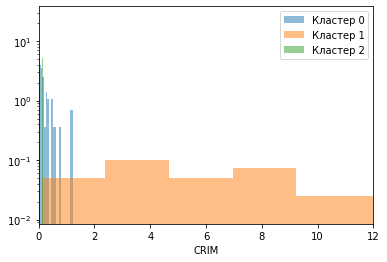

In [36]:
plt.hist(X_test.loc[labels_test == 0, 'CRIM'], bins=20, density=True, alpha=0.5, log=True)
plt.hist(X_test.loc[labels_test == 1, 'CRIM'], bins=20, density=True, alpha=0.5, log=True)
plt.hist(X_test.loc[labels_test == 2, 'CRIM'], bins=20, density=True, alpha=0.5, log=True)

plt.xlim(0, 12)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM')

plt.show()